In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def R_dprime(l,e,R,R_prime,rho):
    first = -float(2*R_prime/rho)
    second = float((l*(l+1)/(rho**2))-(2/rho)-e)*R
    return first + second

def solve(l,delta,n_steps,e):
    if l == 0:
        R = 1.
        R_prime = -1.

    if l > 0:
        R = 0.
        R_prime = -1

    R_arr = []
    R_arr.append(R)
    rho = 1e-7
    rho_arr = []
    rho_arr.append(rho)
    
    for i in range(0,n_steps):
        R_dprime_ = R_dprime(l,e,R,R_prime,rho)
        R_prime += delta*R_dprime_
        R += delta*R_prime
        rho += delta
    
        R_arr.append(R)
        rho_arr.append(rho)

    return rho_arr, R_arr

solve(0,0.01,20,-0.990099)

([1e-07,
  0.0100001,
  0.0200001,
  0.030000100000000002,
  0.040000100000000004,
  0.050000100000000006,
  0.06000010000000001,
  0.07000010000000001,
  0.0800001,
  0.0900001,
  0.1000001,
  0.11000009999999999,
  0.12000009999999998,
  0.13000009999999998,
  0.1400001,
  0.1500001,
  0.1600001,
  0.17000010000000002,
  0.18000010000000002,
  0.19000010000000003,
  0.20000010000000004],
 [1.0,
  0.9900990099001676,
  0.980296049405957,
  0.9705901479257195,
  0.9609803444796227,
  0.951465687601985,
  0.9420452352475774,
  0.9327180546983511,
  0.9234832224710895,
  0.914339824225974,
  0.9052869546760558,
  0.896323717497623,
  0.8874492252414556,
  0.87866259924496,
  0.8699629695451718,
  0.8613494747926215,
  0.8528212621660519,
  0.844377487287981,
  0.8360173141410994,
  0.827739914985497,
  0.8195444702767084])

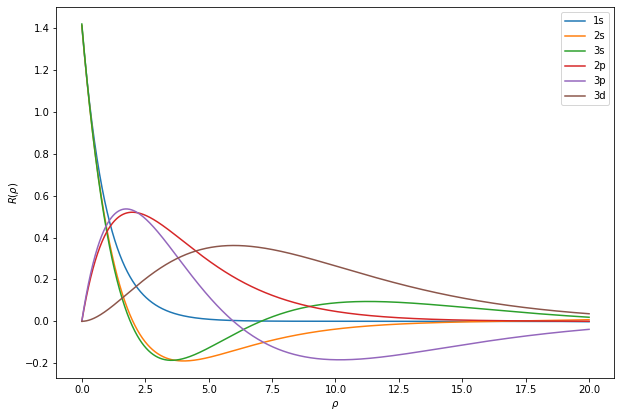

In [5]:
delta = 0.01 # Paso
n_steps = int(20/delta) # N´umero de pasos

# Energ´ıas encontradas para cada estado
e = [-0.990099,-0.249,-0.107,-0.2502, -0.1101,-0.111]
states = ['1s','2s','3s','2p','3p','3d']

# Primera gr´afica (funci´on de onda radial)
plt.figure(figsize = (10,15))
plt.subplot(211)
for i in range(0,len(e)):
    if i < 3:
        x,y = solve(0,delta,n_steps,e[i])
        x,y = np.array(x),np.array(y)
        y = y/np.sqrt(np.trapz(y**2,x)) # "normalizaci´on"
        plt.plot(x,y, label = '{}'.format(states[i]))
    if i >= 3 and i < 5:
        x,y = solve(1,delta,n_steps,e[i])
        x,y = np.array(x),np.array(y)
        y = y/np.sqrt(np.trapz(y**2,x)) # "normalizaci´on"
        plt.plot(x,y, label = '{}'.format(states[i]))
    if i == 5:
        x,y = solve(2,delta,n_steps,e[i])
        x,y = np.array(x),np.array(y)
        y = y/np.sqrt(np.trapz(y**2,x)) # "normalizaci´on"
        plt.plot(x,y, label = '{}'.format(states[i]))

plt.xlabel(r'$\rho$')
plt.ylabel(r'$R (\rho)$')
plt.legend()


In [ ]:

69 # Segunda gr´afica (distribuci´on de probabilidad radial)
70 plt.subplot(212)
71 for i in range(0,len(e)):
72 if i < 3:
73 x,y = solve(0,delta,n_steps,e[i])
74 x,y = np.array(x),np.array(y)
75 y = (x**2)*(y**2)
76 y = y/np.trapz(y,x) # Normalizaci´on
77 plt.plot(x,y, label = '{}'.format(states[i]))
78 if i >= 3 and i < 5:
79 x,y = solve(1,delta,n_steps,e[i])
80 x,y = np.array(x),np.array(y)
81 y = (x**2)*(y**2)
82 y = y/np.trapz(y,x) # Normalizaci´on
83 plt.plot(x,y, label = '{}'.format(states[i]))
84 if i == 5:
85 x,y = solve(2,delta,n_steps,e[i])
86 x,y = np.array(x),np.array(y)
87 y = (x**2)*(y**2)
88 y = y/np.trapz(y,x) # Normalizaci´on
89 plt.plot(x,y, label = '{}'.format(states[i]))
90
91
92 plt.xlabel(r'$\rho$')
93 plt.ylabel(r'$P (\rho)$')
94 plt.legend()
95 plt.tight_layout()
96 plt.savefig('1.png') # Ac´a se guarda la imagen